### `Ali Almalki` 

#### **Transformations - Translations and Rotations**

In this tutorial I am going to do the following: 
1. Perform Image Translations
2. Rotations with getRotationMatrix2D
3. Rotations with Transpose
4. Flipping Images

In [1]:
# Import required libraries 
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Create a helper function to display an image 
def display_image(title="", image=None, size=10):
  """
  This function takes an image as an input and returns a displayed image.
  """

  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h 
  plt.figure(figsize=(size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show() # display the image

In [3]:
# Download images 
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip

--2022-06-29 17:39:44--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.10
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  22.5MB/s    in 1.3s    

2022-06-29 17:39:46 (22.5 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [4]:
# Unzip images folder
!unzip -qq images.zip

### **Translations**

This an affine transform that simply shifts the position of an image. (left or right).

We use cv2.warpAffine to implement these transformations.

```cv2.warpAffine(image, T, (width, height))```

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/warp.png)

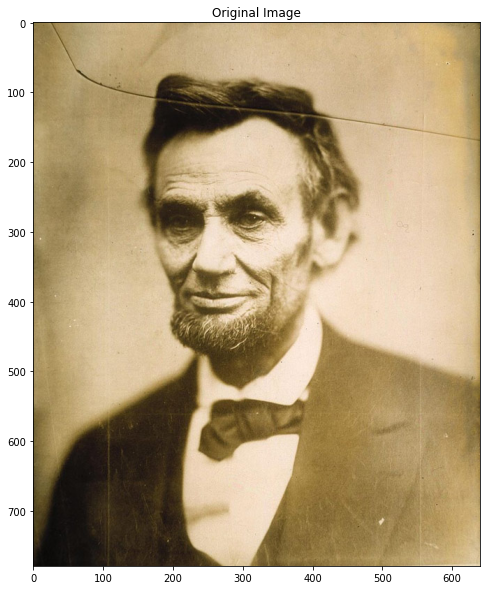

In [9]:
# Load a sample image 
image = cv2.imread("/content/images/abraham.jpg")
display_image("Original Image", image)

In [10]:
# Store height and width of the image
height, width = image.shape[:2]

In [11]:
# We shift it by quarter of the height and width
quarter_height, quarter_width = height/4, width/4

In [12]:
# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

`cv2.warpAffine`: Applies an affine transformation to an image.
  
The function warpAffine transforms the source image using the specified matrix.


```cv2.warpAffine(image, T, (width, height))```

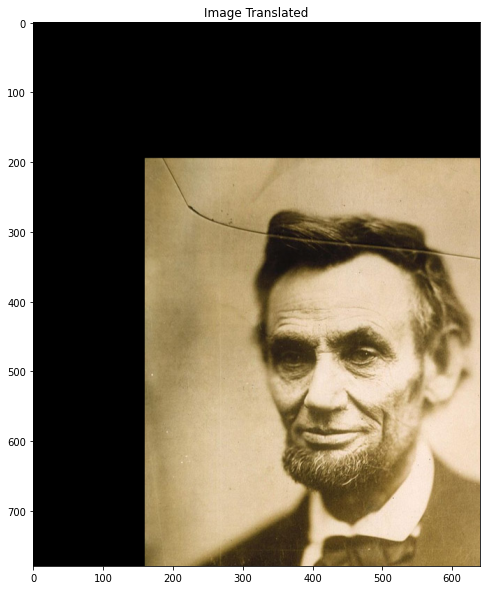

In [14]:
# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
display_image("Image Translated", img_translation)

In [15]:
# What does T look like
print(T)

print(height, width )

[[  1.     0.   160.  ]
 [  0.     1.   194.75]]
779 640


### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)


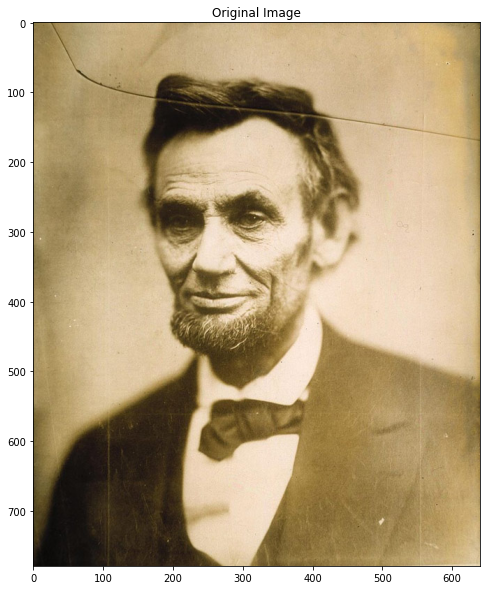

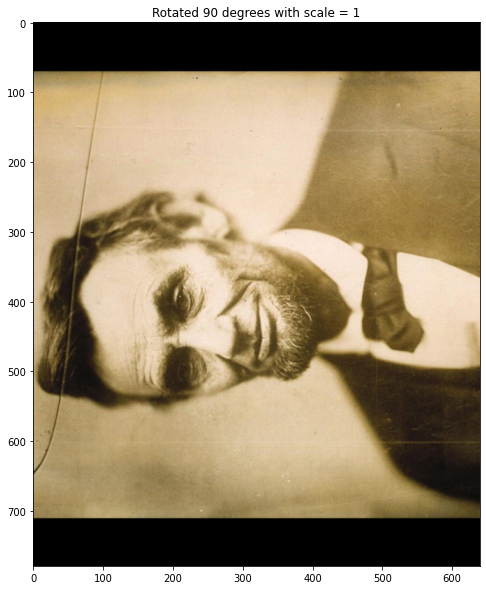

In [17]:
# Load a sample image 
image = cv2.imread("/content/images/abraham.jpg")
display_image("Original Image", image)

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
display_image("Rotated 90 degrees with scale = 1", rotated_image)

[[ 3.061617e-17  5.000000e-01  1.252500e+02]
 [-5.000000e-01  3.061617e-17  5.495000e+02]]


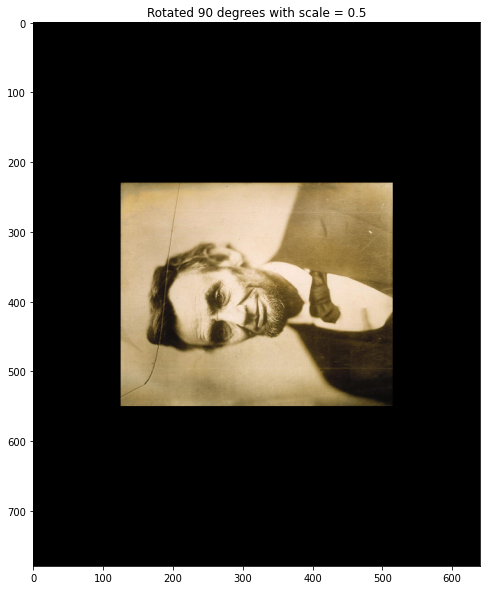

In [19]:
# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(rotation_matrix)
# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
display_image("Rotated 90 degrees with scale = 0.5", rotated_image)

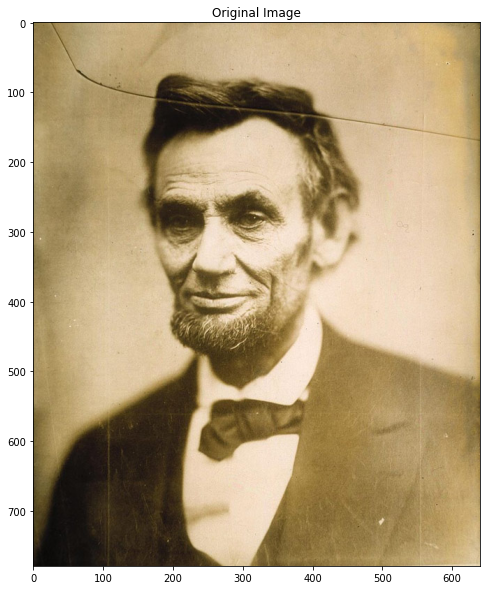

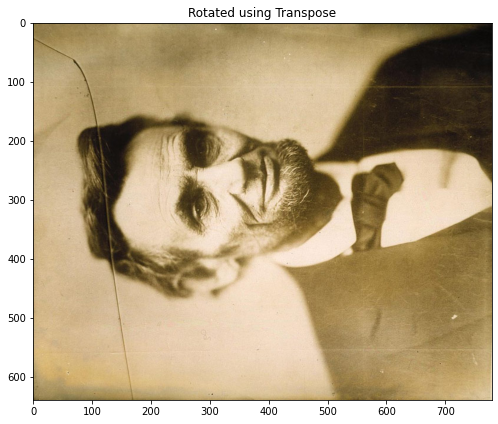

In [20]:
rotated_image = cv2.transpose(image)
display_image("Original Image", image)
display_image("Rotated using Transpose", rotated_image)

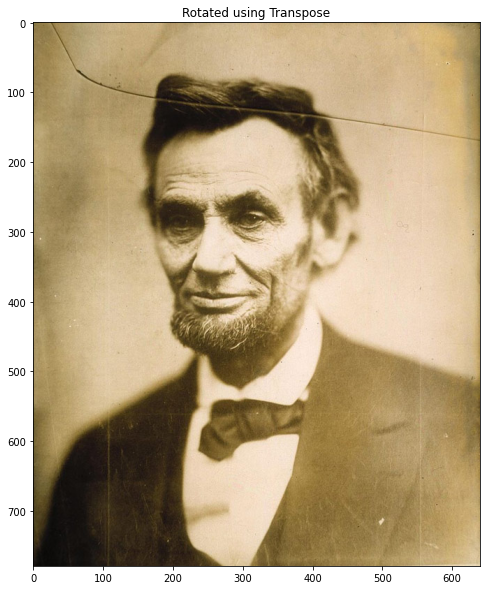

In [21]:
rotated_image = cv2.transpose(image)
rotated_image = cv2.transpose(rotated_image)

display_image("Rotated using Transpose", rotated_image)

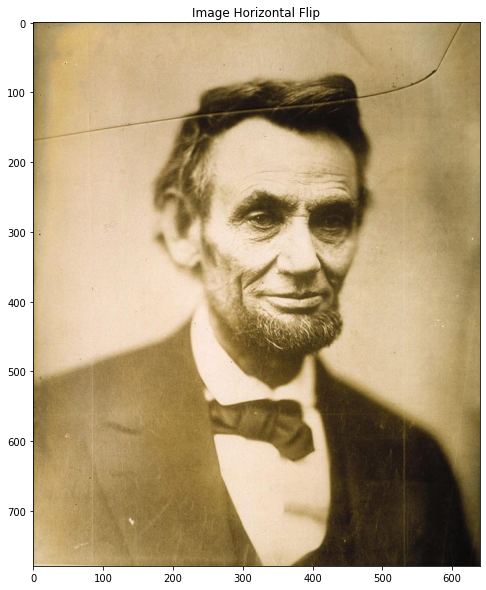

In [22]:
# Image horizontal flip
flipped = cv2.flip(image, 1)
display_image("Image Horizontal Flip", flipped)

### References: 

* [OpenCV Documentation](https://docs.opencv.org/4.x/)